# STAT479: Machine Learning -- L05: Decision Trees in Scikit-Learn Demo

STAT 479: Machine Learning (Fall 2019)  
Instructor: Sebastian Raschka (sraschka@wisc.edu)  

Course website: http://stat.wisc.edu/~sraschka/teaching/stat479-fs2019/  

In [1]:
%load_ext watermark
%watermark  -d -u -a 'Sebastian Raschka' -v -p numpy,scipy,matplotlib,sklearn

Sebastian Raschka 
last updated: 2019-10-03 

CPython 3.7.3
IPython 7.7.0

numpy 1.16.4
scipy 1.3.1
matplotlib 3.1.1
sklearn 0.21.2


In [2]:
from sklearn import datasets
import numpy as np


iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [3]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [4]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


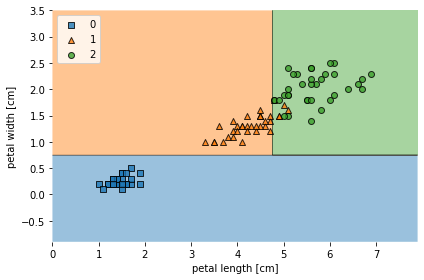

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions


tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=2, 
                              random_state=1)
tree.fit(X_train, y_train)


plot_decision_regions(X_train, y_train, tree)

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('images/sklearn_tree.png', dpi=300)
plt.savefig('images/sklearn_tree.pdf')
plt.show()

In [6]:
# you may need to run

# conda install pydotplus
# conda install graphviz

# in your command line

In [7]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz


dot_data = export_graphviz(tree,
                           filled=True, 
                           rounded=True,
                           class_names=['Setosa', 
                                        'Versicolor',
                                        'Virginica'],
                           feature_names=['petal length', 
                                          'petal width'],
                           out_file=None) 
graph = graph_from_dot_data(dot_data) 
graph.write_png('images/tree.png')

True

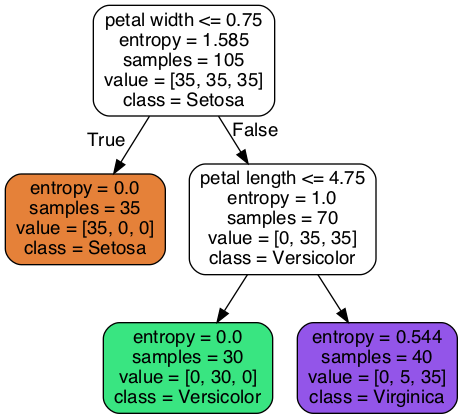

In [8]:
from IPython.display import Image


Image('images/tree.png')